# Summary

In this notebook, we will perform Exploratory Data Analysis (EDA) in Python. Steps:
1. Preliminary
2. Data cleaning / Feature Engineering / Data Manipulation
3. Reading and Extracting Data

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [2]:
# adjust the path accordingly
df = pd.read_csv('admission_data_final.csv')
data = df.copy()

# df -> for feature engineering before machine learning
# data -> for EDA process
# data di-copy dari df supaya dalam proses EDA hanya dilakukan pada data tidak dengan df

#  Preliminary

## Sample of data

In [3]:
# Showing top 5 rows of the data
data.head(7)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,id_student,final_score
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1,male,bachelor,STD1000,960
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1,female,master,STD1001,887
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1,male,bachelor,STD1002,780
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1,female,master,STD1003,851
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0,male,bachelor,STD1004,473
5,330.0,115.0,5.0,4.5,3.0,9.34,yes,1,male,master,STD1005,908
6,321.0,109.0,3.0,3.0,4.0,8.20,yes,1,male,bachelor,STD1006,819


In [4]:
data['admit_status'].value_counts()

1    290
0    215
Name: admit_status, dtype: int64

In [5]:
data.tail(7)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,id_student,final_score
498,312.0,103.0,4.0,4.0,5.0,8.43,no,1,male,master,STD1498,843
499,327.0,113.0,4.0,4.5,4.5,9.04,no,1,female,bachelor,STD1499,902
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1,male,bachelor,STD1500,825
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1,female,bachelor,STD1501,889
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0,female,bachelor,STD1502,594
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0,female,bachelor,STD1503,584
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1,male,bachelor,STD1504,843


In [6]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,id_student,final_score
441,332.0,112.0,1.0,1.5,3.0,8.66,yes,1,female,master,STD1441,870
25,340.0,120.0,5.0,4.5,4.5,9.60,yes,1,male,master,STD1025,978
48,321.0,110.0,3.0,3.5,5.0,8.85,yes,1,female,bachelor,STD1048,876
349,313.0,101.0,3.0,2.5,3.0,8.04,no,0,female,bachelor,STD1349,447
42,313.0,107.0,2.0,NaN,2.0,8.50,yes,0,female,master,STD1042,300


Observations:
1. All columns, except `research_exp` column, are numeric
2. `research_exp` column seems to contain two distinct values (yes OR no), but will confirm later
3. `admit_status` is apparently also binary (0,1)
4. No obvious defect on the data (column name vs its entries), all looks good

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
 8   gender                   505 non-null    object 
 9   education                505 non-null    object 
 10  id_student               505 non-null    object 
 11  final_score              505 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 47.5+ KB


Observation:
1. Data contains 11 columns with 505 rows
2. Most of the columns have missing values (except `research_exp` and `admit_status`,`gender`,`education`,`id_student`,`final_score`), they will be handled later
3. All dtypes seem OK (appropriate), given the corresponding column name
4. id_student set to index beacause of unique value

# Statistical Summary

In [8]:
data.columns

Index(['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength',
       'recommendation_strength', 'gpa', 'research_exp', 'admit_status',
       'gender', 'education', 'id_student', 'final_score'],
      dtype='object')

In [9]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['research_exp','gender']

numericals = ['gre_score', 'toefl_score', 'univ_ranking',
              'motiv_letter_strength','recommendation_strength',
              'gpa','admit_status','final_score']

In [10]:
# Syntax numerical statistical summary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status,final_score
count,496.000000,497.000000,498.000000,503.000000,499.000000,501.000000,505.000000,505.000000
mean,316.483871,107.173038,3.134538,3.387674,3.482966,8.574790,0.574257,689.366337
std,11.218840,6.020650,1.134768,0.985860,0.928255,0.601478,0.494945,210.628412
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,300.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,487.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,785.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,876.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1000.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean ~ 50% (Median) in `gre_score`, `toefl_score`, and `gpa` column, indicating somewhat a symmetrical distribution
* `admit_status` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. Only need to check balance level
* `univ_ranking`, `motiv_letter_strength`, and `recommendation_strength` are discrete values with not that many unique values, need to check values distribution later.


In [11]:
# Syntax describe method on categorical data
data[categoricals].describe()

,research_exp,gender
count,505,505
unique,2,2
top,yes,female
freq,281,256


Observations:
* `research_exp and gender` have 2 unique value, 'yes', and 'no'. female and male
* student most have research_exp (280 rows), and the rest have no research experience. Female with 254 rows.

In [12]:
categoricals

['research_exp', 'gender']

In [13]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')
  print(data[col].value_counts(normalize=True), '\n')

Value counts of research_exp column
yes    281
no     224
Name: research_exp, dtype: int64 

yes    0.556436
no     0.443564
Name: research_exp, dtype: float64 

Value counts of gender column
female    256
male      249
Name: gender, dtype: int64 

female    0.506931
male      0.493069
Name: gender, dtype: float64 



In [39]:
data['admit_status'].value_counts(normalize=True) # percent
# in case ML checking target variabel

1    0.575697
0    0.424303
Name: admit_status, dtype: float64

# Feature Engineering / Data Cleaning / Data Manipulation : Istilah yg sama

## 1. Duplicate Handling

In [15]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom, nanti hanya pilih 1 saja, karena yang duplikat hanya 44 baris
duplicates = data[data.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,id_student,final_score
9,328.0,108.0,4.0,4.5,4.0,9.18,yes,1,female,bachelor,STD1501,889
14,311.0,104.0,3.0,3.5,2.0,8.20,yes,0,female,master,STD1014,503
154,311.0,104.0,3.0,3.5,2.0,8.20,yes,0,female,master,STD1014,503
163,317.0,105.0,3.0,3.5,3.0,8.56,no,0,female,bachelor,STD1163,539
485,317.0,105.0,3.0,3.5,3.0,8.56,no,0,female,bachelor,STD1163,539
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1,female,bachelor,STD1501,889


Pada kode (df[df.duplicated(keep=False)]), Anda langsung mencetak baris yang memiliki duplikat dengan menggunakan metode duplicated dan memasukkan parameter keep=False. Ini mencetak semua baris yang memiliki duplikat tanpa mengurangi apa pun dari DataFrame.

In [16]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [17]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom, nanti hanya pilih 1 saja, karena yang duplikat hanya 44 baris
duplicates = data[data.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,id_student,final_score


In [18]:
# set id to index because of id student is unique
data = data.set_index("id_student")
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,final_score
id_student,,,,,,,,,,,
STD1000,337.0,118.0,4.0,4.5,4.5,9.65,yes,1,male,bachelor,960
STD1001,324.0,107.0,4.0,4.0,4.5,8.87,yes,1,female,master,887
STD1002,316.0,104.0,3.0,3.0,3.5,8.00,yes,1,male,bachelor,780
STD1003,322.0,110.0,3.0,3.5,2.5,8.67,yes,1,female,master,851
STD1004,314.0,103.0,2.0,2.0,3.0,8.21,no,0,male,bachelor,473


#### Telah dihandling drop duplikat

# 2. Missing value handling
### Identifying Missing value

In [19]:
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
gender                     0
education                  0
final_score                0
dtype: int64

In [20]:
data.isnull().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
gender                     0
education                  0
final_score                0
dtype: int64

In [21]:
len(data)

502

In [22]:
data.columns

Index(['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength',
       'recommendation_strength', 'gpa', 'research_exp', 'admit_status',
       'gender', 'education', 'final_score'],
      dtype='object')

In [23]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'gre_score' Has 9 missing values (1.79%)
Column 'toefl_score' Has 8 missing values (1.59%)
Column 'univ_ranking' Has 7 missing values (1.39%)
Column 'motiv_letter_strength' Has 2 missing values (0.40%)
Column 'recommendation_strength' Has 6 missing values (1.20%)
Column 'gpa' Has 4 missing values (0.80%)
Column 'research_exp' Has 0 missing values (0.00%)
Column 'admit_status' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'education' Has 0 missing values (0.00%)
Column 'final_score' Has 0 missing values (0.00%)


The percentage of missing values below 20% so we handle numerically with median, categorical with mode. But the categorical data type does not have missing values, namely research_exp.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, STD1000 to STD1504
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                493 non-null    float64
 1   toefl_score              494 non-null    float64
 2   univ_ranking             495 non-null    float64
 3   motiv_letter_strength    500 non-null    float64
 4   recommendation_strength  496 non-null    float64
 5   gpa                      498 non-null    float64
 6   research_exp             502 non-null    object 
 7   admit_status             502 non-null    int64  
 8   gender                   502 non-null    object 
 9   education                502 non-null    object 
 10  final_score              502 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 47.1+ KB


In [25]:
data['research_exp'].dtype

dtype('O')

In [26]:
# ini sama
# data[column] = data[column].fillna(data[column].mode()[0])
# data[column].fillna(data[column].mode()[0], inplace=True)

In [27]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else: # karena tipe data hanya object dan numerik saja tidak ada yg lain, maka pakai else berikut
        # Jika kolom bertipe numerik, isi dengan median
        data[column].fillna(data[column].median(), inplace=True)

In [28]:
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
gender                     0
education                  0
final_score                0
dtype: int64

In [29]:
data.isnull().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
gender                     0
education                  0
final_score                0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, STD1000 to STD1504
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                502 non-null    float64
 1   toefl_score              502 non-null    float64
 2   univ_ranking             502 non-null    float64
 3   motiv_letter_strength    502 non-null    float64
 4   recommendation_strength  502 non-null    float64
 5   gpa                      502 non-null    float64
 6   research_exp             502 non-null    object 
 7   admit_status             502 non-null    int64  
 8   gender                   502 non-null    object 
 9   education                502 non-null    object 
 10  final_score              502 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 47.1+ KB


Success removing NULL values!

# 3. Encoding

In [31]:
# Label Encoding for ordinal category
# 1. research_exp -> yes=1, no=0
data["research_exp"] = data["research_exp"].str.lower().map({"yes": 1, "no": 0})

# 2. education -> ordinal encoding (bachelor=1, master=2)
edu_map = {"bachelor": 1, "master": 2}
data["education"] = data["education"].str.lower().map(edu_map)
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,gender,education,final_score
id_student,,,,,,,,,,,
STD1000,337.0,118.0,4.0,4.5,4.5,9.65,1,1,male,1,960
STD1001,324.0,107.0,4.0,4.0,4.5,8.87,1,1,female,2,887
STD1002,316.0,104.0,3.0,3.0,3.5,8.00,1,1,male,1,780
STD1003,322.0,110.0,3.0,3.5,2.5,8.67,1,1,female,2,851
STD1004,314.0,103.0,2.0,2.0,3.0,8.21,0,0,male,1,473


In [32]:
# One Hot Encoding for nominal category
# 3. gender -> One Hot Encoding (OHE)
data = pd.get_dummies(data, columns=["gender"], prefix="gender")
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,education,final_score,gender_female,gender_male
id_student,,,,,,,,,,,,
STD1000,337.0,118.0,4.0,4.5,4.5,9.65,1,1,1,960,0,1
STD1001,324.0,107.0,4.0,4.0,4.5,8.87,1,1,2,887,1,0
STD1002,316.0,104.0,3.0,3.0,3.5,8.00,1,1,1,780,0,1
STD1003,322.0,110.0,3.0,3.5,2.5,8.67,1,1,2,851,1,0
STD1004,314.0,103.0,2.0,2.0,3.0,8.21,0,0,1,473,0,1


# Univariate Analysis
###
1. Boxplot to check outlier, and handle outlier
2. Distribution Check using Histogram / KDE
3. Countplot

## 4. Outlier Handling

In [33]:
numericals

['gre_score',
 'toefl_score',
 'univ_ranking',
 'motiv_letter_strength',
 'recommendation_strength',
 'gpa',
 'admit_status',
 'final_score']

In [34]:
features = numericals
for i in range(0, len(features)):
  print(i)

0
1
2
3
4
5
6
7


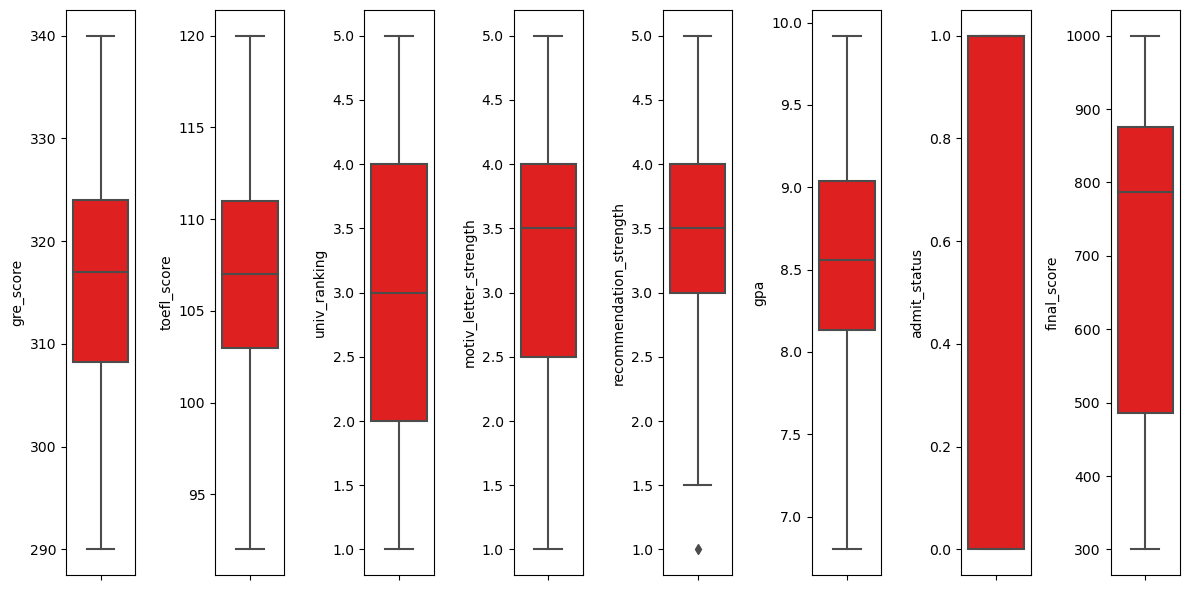

In [35]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [36]:
# check the outlier full profile
outlier = data['recommendation_strength'].min()

data[data['recommendation_strength'] == outlier]

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status,education,final_score,gender_female,gender_male
id_student,,,,,,,,,,,,
STD1347,299.0,94.0,1.0,1.0,1.0,7.34,0,0,2,312,1,0


Obervation:
1. There is one outlier in the `recommendation_strength` column (value = 1)
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

In [37]:
## Notes jika ada outlier dan harus di handle gunakan code dibawah :
# def find_outlier_boundary(df, variable):

#     # Mari kita hitung batas luar yang merupakan outlier

#     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

#     lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
#     upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

#     return upper_boundary, lower_boundary

# batas untuk kolom_A

# upper_kolom_A, lower_kolom_A = find_outlier_boundary(data, 'kolom_A')
# upper_kolom_A, lower_kolom_A

## KDE plot for knowing the distribution form

C:\Users\ASUS\Documents\Miniconda\envs\jcopml\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

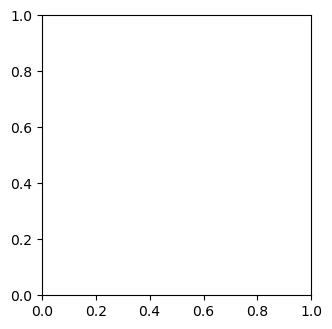

In [38]:
# adjust the figure size for better readability
# --- Setup ---
features = numericals
n_features = len(features)

# Tentukan layout grid (misal 2 baris x 4 kolom untuk 8 fitur)
n_rows = 2
n_cols = 4

plt.figure(figsize=(16, 8))

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=data[col], color='skyblue', kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Observation:
1. Continuous numeric features: `gre_score`, `toefl_score`, and `gpa` are somewhat symmetric, typical/most frequent values are 320 (`gre_score`), 105 (`toefl_score`), and 8.5 (`gpa`)
2. Meanwhile for columns with discrete values such as `univ_ranking`, `motiv_letter_strength`, and `recommendation_strength`, most students have 3 in `univ_ranking`, 3.5 in `motiv_letter`, and 3 in `recommendation_strength`
3. In terms of the target variable, `admit_status = 1` is more frequent in the dataset, but it's not that extreme.

In [ ]:
# count plot for research_exp column
sns.countplot(data=data, x="research_exp")

In [ ]:
# bivariate -> research_exp vs admit_status (legenda)
# research_exp affect admit_status?
sns.countplot(data=data,x='research_exp',hue='admit_status')

# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see outlier in `recommendation_strength` column. But it makes sense, because the min and max value are 1 and 5, the outlier is at "1", and it's possible (no need to drop)
5. From barcharts of `admit_status` and `research_exp` column,  We can say that, applicants with research experience is more likely to be admitted.
6. From correlation heatmap: `toefl_score`, `gre_score`, `motiv_letter_strength`, `univ_rank`, and `gpa` are highly correlated each other. We can choose either of them for modelling.